In [1]:
from datetime import date
from nearestPD import nearestPD
from functions import points2distance, find_centre_region
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


6

In [4]:
region = xr.open_dataset("regions_verify_202011.nc")
region

<xarray.Dataset>
Dimensions:             (latitude: 180, longitude: 360)
Coordinates:
  * latitude            (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude           (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    transcom_regions    (latitude, longitude) int32 ...
    regions_bio         (latitude, longitude) int64 ...
    regions_bio_categ   (latitude, longitude) int64 ...
    regions_anth        (latitude, longitude) int64 ...
    regions_anth_categ  (latitude, longitude) int64 ...
Attributes:
    description:  Covariance related parameters for CTDAS-CH4

In [15]:
#northern high latitudes zoom in, corresponding mTC regions

nhl = list(range(1, 7)) + [15, 16] + list(range(23, 30))
print('NHL 1x1 mTCs: ', nhl)
print(len(nhl))

NHL 1x1 mTCs:  [1, 2, 3, 4, 5, 6, 15, 16, 23, 24, 25, 26, 27, 28, 29]
15


(180, 360)


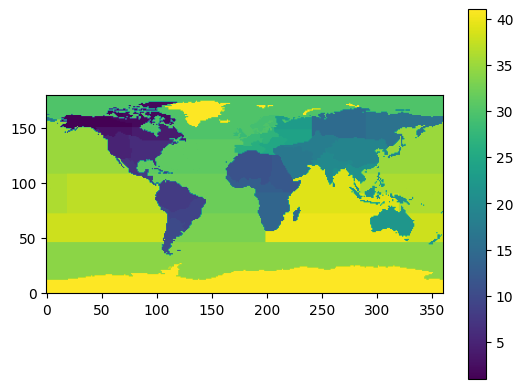

In [16]:
transcom_regions = region.transcom_regions.values
print(transcom_regions.shape)


tc = xr.DataArray(transcom_regions)
plt.imshow(tc, origin = "lower")
plt.colorbar()

In [17]:
# numbering of tc regions starts from 1 
transcom_regions.min()

1

In [18]:
regbio = region.regions_bio.values
print(regbio.min())
print(regbio.shape)


1
(180, 360)


In [12]:
len(set(regbio.flatten())) #check if each of the 6858 values appears

6858

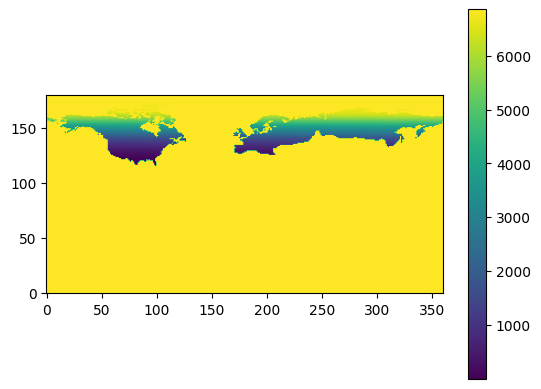

In [6]:
bio = xr.DataArray(regbio)
plt.imshow(bio, origin = "lower")
plt.colorbar()

In [12]:
region.regions_bio_categ

<xarray.DataArray 'regions_bio_categ' (latitude: 180, longitude: 360)>
array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    comment:  Categories of optimization regions. For high northern mTCS, opt...

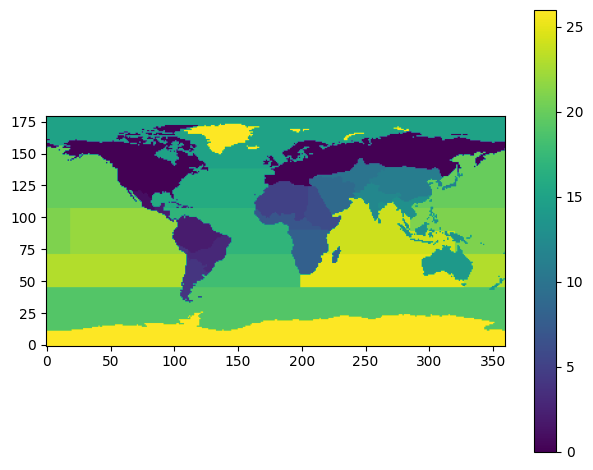

In [14]:
regbio_cat = region.regions_bio_categ.values
bio_cat = xr.DataArray(regbio_cat)
plt.imshow(bio_cat, origin = 'lower')
plt.colorbar()
plt.tight_layout()



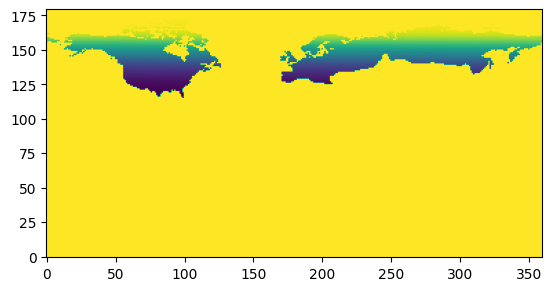

In [23]:
reg_anth = region.regions_anth.values
anth = xr.DataArray(reg_anth)
plt.imshow(anth, origin = 'lower')

In [13]:
region.regions_anth_categ

<xarray.DataArray 'regions_anth_categ' (latitude: 180, longitude: 360)>
array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15]])
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    comment:  Categories of optimization regions. For high northern mTCS, opt...

In [14]:
#how many different categories
len(set(region.regions_anth_categ.values.flatten()))

27

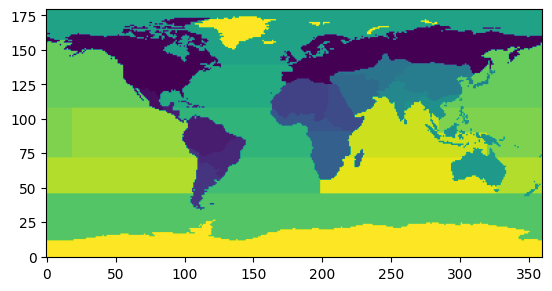

In [15]:
reg_anth_cat = xr.DataArray(region.regions_anth_categ.values)
plt.imshow(reg_anth_cat, origin = 'lower')


# Inspect the cov matrices created by the code

In [19]:
ds = xr.open_dataset("/home/pietaril/Documents/data/maijastest_regions_verify_202308_cov.nc")

In [15]:
ds

<xarray.Dataset>
Dimensions:           (nparams_bio: 6858, nparams_anth: 6858,
                       nparams_anth2: 6858)
Coordinates:
  * nparams_bio       (nparams_bio) int64 0 1 2 3 4 ... 6853 6854 6855 6856 6857
  * nparams_anth      (nparams_anth) int64 0 1 2 3 4 ... 6854 6855 6856 6857
  * nparams_anth2     (nparams_anth2) int64 0 1 2 3 4 ... 6854 6855 6856 6857
Data variables:
    covariance_bio    (nparams_bio, nparams_bio) float64 ...
    covariance_anth   (nparams_anth, nparams_anth) float64 ...
    covariance_anth2  (nparams_anth2, nparams_anth2) float64 ...

In [7]:
#compare to the matrix Aki sent me
ds2 = xr.open_dataset("/home/pietaril/Documents/data/regions_verify_202104_cov.nc")
ds2

<xarray.Dataset>
Dimensions:           (nparams_bio: 6858, nparams_anth: 6858,
                       nparams_anth2: 6858)
Coordinates:
  * nparams_bio       (nparams_bio) int64 0 1 2 3 4 ... 6853 6854 6855 6856 6857
  * nparams_anth      (nparams_anth) int64 0 1 2 3 4 ... 6854 6855 6856 6857
  * nparams_anth2     (nparams_anth2) int64 0 1 2 3 4 ... 6854 6855 6856 6857
Data variables:
    covariance_bio    (nparams_bio, nparams_bio) float64 ...
    covariance_anth   (nparams_anth, nparams_anth) float64 ...
    covariance_anth2  (nparams_anth2, nparams_anth2) float64 ...

In [13]:
ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [28]:
import matplotlib.colors as colors 

bounds = [0.0, 0.0001, 0.001, 0.01, 0.1, 0.7]
cov = ds.covariance_bio

vals = cov.values
fig, ax = plt.subplots(figsize = (11, 11))
#cov.plot.imshow(robust = True, origin = 'upper')
c = ax.pcolor(cov, norm = colors.LogNorm(vmin = vals.min(), vmax= vals.max()), cmap='magma')
fig.colorbar(c, ax=ax)
